# Advanced ML Домашнее Задание 1
Ястребов Вячеслав MADE-ML-22

## Imports

In [3]:
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.integrate as integrate
import scipy.stats as st
import seaborn as sns
from sklearn import linear_model

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (15,8)
legend_fontsize = 16

## Часть 1

### Задача 1

#### Условие

Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.


#### Решение

Прокурор должен был оценить апостериорную вероятность того, что подсудимый виновен, учитывая, что у него редкая группа крови, найденная на месте преступления, т.е. условную вероятность P(В|Г), где В - виновен, Г - группа крови.  

В то же время он учёл только лишь априорную вероятность того, что у подсудимого эта редкая группа крови. 

Рассмотрим фразу "Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен". В таком случае: 

$ P(Г|B) + P(Г|\hat{B}) = 1 $, но по формуле полной вероятности $ P(Г) = P(Г|B) + P(Г|\hat{B}) = 0.01 $  
Противоречие.

### Задача 2

#### Условие
Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?

#### Решение
Адвокат оценил вероятность того, что если собрать всех людей с такой группой крови и случайно выбрать одного из них, то он окажется убийцей. Проводя аналогию с случайным вытягиванием шариков из корзины: у нас 9999 красных и 1 чёрный шар. И адвокат оценил вероятность случайным образом вытащить чёрный шар. 

В то же время, он должен был оценить вероятность того, что конкретный человек, подсудимый, виновен. 



### Задача 3

#### Условие
Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?


#### Решение

Распишем уравнения апостериорной вероятности болезни

* Б - болен
* П - положительный результат теста
* О - отрицательный результат теста 
* $ P_{FP} $  - вероятность ложноположительного результата
* $ P_{FN} $ - вероятность ложноотрицательного результата

**После положительного результата теста:**

$$ P(Б|П) = \frac{P(П \cap Б)}{P(П)} = \frac{(1 - P_{FN}) * 0.01}{(1 - P_{FN}) * 0.01 + P_{FP} * 0.99} $$

**После отрицательного результата теста:**

$$ P(Б|О) = \frac{P(О \cap Б)}{P(О)} = \frac{P_{FN} * 0.01}{P_{FN} * 0.01 + (1 - P_{FP}) * 0.99} $$


In [4]:
POSITIVE = "положительном"
NEGATIVE = "отрицательном"

def compute_posterior(result, prior_prob=0.01, test_fn=0.05, test_fp=0.05):
    if result == POSITIVE:
        numerator = prior_prob * (1 - test_fn)
        denominator = numerator + (1 - prior_prob) * test_fp
    elif result == NEGATIVE:
        numerator = prior_prob * test_fn
        denominator = numerator + (1 - prior_prob) * (1 - test_fp)
    else: 
        return None
    return numerator / denominator


vector_posterior = np.vectorize(compute_posterior, excluded=["prior_prob", "result"])
false_probs = np.arange(0.00, 0.05, 0.001)
deafult_probs = np.full(false_probs.shape, 0.05)

def plot_posterior(result):
    fns_posterior = vector_posterior(result=result, test_fn=false_probs, test_fp=deafult_probs)
    fps_posterior = vector_posterior(result=result, test_fn=deafult_probs, test_fp=false_probs)

    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)

    ax.plot(false_probs, fns_posterior, linewidth=2, label=f'вероятность FN')
    ax.plot(false_probs, fps_posterior, linewidth=2, label=f'вероятность FP')
    
    ax.set_xlim((0.0, 0.05))
    ax.set_xlabel(f'Априорная вероятность болезни при {result} результате теста', fontsize=legend_fontsize)
    ax.legend(fontsize=legend_fontsize)
    plt.show()

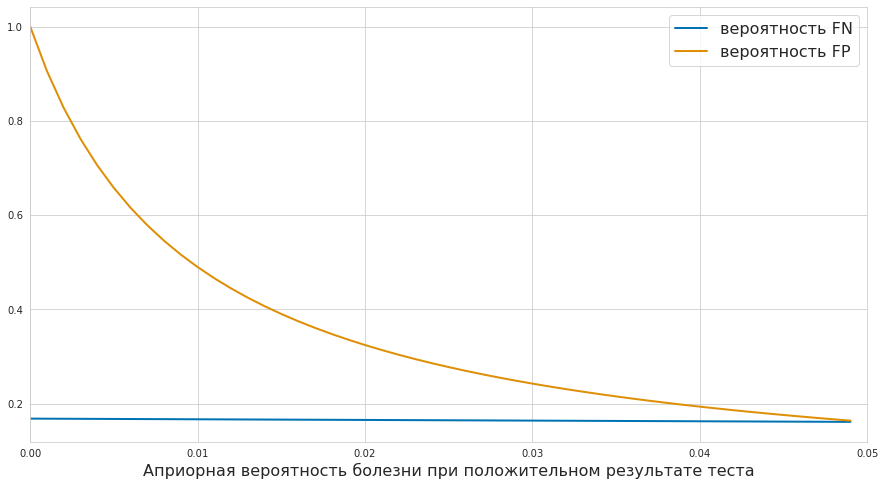

In [5]:
# Зависимость априорной вероятности болезни при положительном результате теста от вероятностей ложнопозитивного и ложноотрицательного результатов
plot_posterior(POSITIVE)

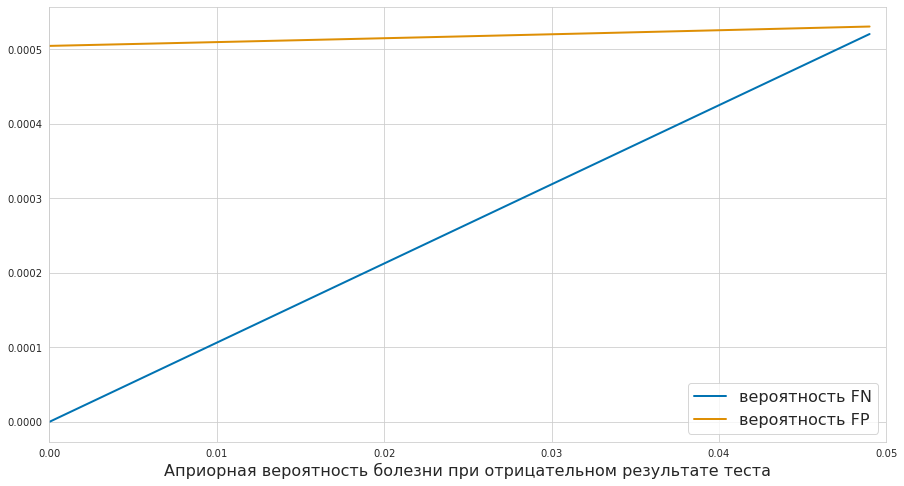

In [6]:
# Зависимость априорной вероятности болезни при отрицательном результате теста от вероятностей ложнопозитивного и ложноотрицательного результатов
plot_posterior(NEGATIVE)

Как можно увидеть из графиков, уменьшение вероятности получить ложнонегативный результат практически не даёт никакого эффекта. При негативном тесте вероятность болезни и без этого очень мала, а при положительном практически нет изменений. 

В то же время ложнопозитивный результат вносит большой вклад в вероятность того, что небольной человек получает позитивный результат. 

Таким образом, врачам следует сосредоточиться на сокращении false positives результатов.

## Часть 2

### Задача 1

#### Условие
Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.

#### Решение

In [53]:
# Скачиваем данные
!wget https://covid.ourworldindata.org/data/owid-covid-data.csv

--2021-02-27 12:40:57--  https://covid.ourworldindata.org/data/owid-covid-data.csv
Resolving covid.ourworldindata.org (covid.ourworldindata.org)... 104.21.233.138, 104.21.233.137, 2606:4700:3038::6815:e98a, ...
Connecting to covid.ourworldindata.org (covid.ourworldindata.org)|104.21.233.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘owid-covid-data.csv’

owid-covid-data.csv     [        <=>         ]  17.39M  4.41MB/s    in 17s     

2021-02-27 12:41:18 (1.02 MB/s) - ‘owid-covid-data.csv’ saved [18231686]



In [72]:
# Считываем
data = pd.read_csv("owid-covid-data.csv")

# Преобразуем строки в datetime
data["date"] = pd.to_datetime(data["date"], format=r"%Y-%m-%d")
# Извлекаем данные из России с 3 марта 2020
first_date = pd.Timestamp(2020, 3, 3)
data = data[(data["location"] == "Russia") & (data["date"] >= first_date)]
data = data[["date", "total_cases", "new_cases"]]
# Заменяем нулевые значения новых случаев на единицы
data["new_cases"] = data["new_cases"].replace(0, 1)
# Берём только первые 50 строк
train_data = data[:50]

#### Задача 2

Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.

<AxesSubplot:xlabel='date'>

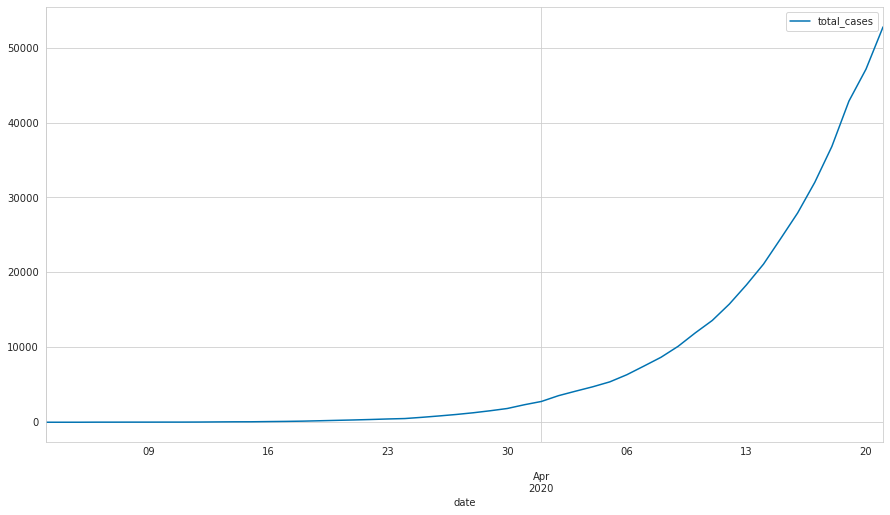

In [73]:
# Количество всех зарегистрированных случаев
train_data.plot(x="date", y="total_cases", figsize=figsize)

<AxesSubplot:xlabel='date'>

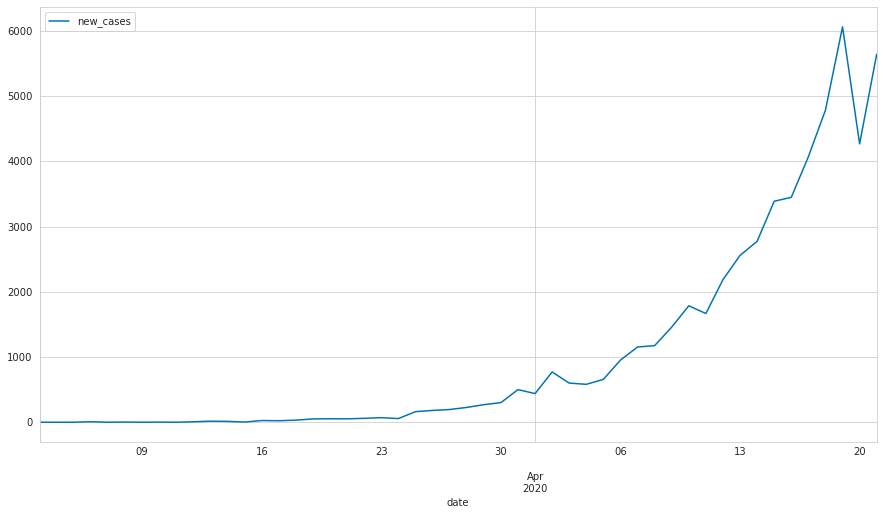

In [74]:
# Количество новых зарегистрированных случаев в день
train_data.plot(x="date", y="new_cases", figsize=figsize)


a) Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.

In [89]:
x = np.arange(1, len(train_data) + 1, 1).reshape(-1, 1)
y = np.log(train_data["new_cases"])

In [90]:
linear_regr = linear_model.LinearRegression()
linear_regr.fit(x, y)

LinearRegression()

б) Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).